# **Lab: Exploratory Data Analysis**


## Objectives
- Examine the structure of a dataset.
- Handle missing values effectively.
- Conduct summary statistics on key columns.
- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.



## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [3]:
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [4]:
# Load the Stack Overflow survey dataset
#data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'

file_path = 'survey_data.csv'
df = pd.read_csv(file_path)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [5]:
a = ['Employment', 'JobSat', 'RemoteWork']
for i in a:
    print(i)
    print(df[i].isna().sum(),"/",df.shape[0])

Employment
0 / 65437
JobSat
36311 / 65437
RemoteWork
10631 / 65437


In [6]:
# fill missing values with the mode
a = df['JobSat'].mode()
b = df['RemoteWork'].mode()

df['JobSat'] = df['JobSat'].fillna(a[0])
df['RemoteWork'] = df['RemoteWork'].fillna(b[0])

In [7]:
# Check Missing
a = ['Employment', 'JobSat', 'RemoteWork']
for i in a:
    print(i)
    print(df[i].isna().sum())

Employment
0
JobSat
0
RemoteWork
0


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).


In [8]:
# Handle missing value
df['YearsCodePro'].isna().sum()

13827

In [9]:
df['YearsCodePro'].value_counts()

YearsCodePro
2                     4168
3                     4093
5                     3526
10                    3251
4                     3215
Less than 1 year      2856
6                     2843
1                     2639
8                     2549
7                     2517
12                    1777
15                    1635
20                    1549
9                     1493
11                    1312
13                    1127
14                    1082
25                     998
16                     946
18                     867
17                     814
30                     689
24                     632
19                     516
22                     492
23                     448
26                     426
21                     380
27                     380
28                     342
35                     285
29                     196
40                     194
32                     194
34                     169
38                     134
33             

In [10]:
# convert object to numeric
conversion = {'Less than 1 year': 0, 'More than 50 years': 51}
df['YearsCodePro'].replace(conversion, inplace=True)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

C:\Users\alvia\AppData\Local\Temp\ipykernel_35412\3857734291.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YearsCodePro'].replace(conversion, inplace=True)


In [11]:
# Analyze the summary
df['YearsCodePro'].describe()

count    51610.000000
mean        10.184344
std          9.109703
min          0.000000
25%          3.000000
50%          7.000000
75%         15.000000
max         51.000000
Name: YearsCodePro, dtype: float64

(array([20497., 12653.,  6933.,  4692.,  2950.,  2033.,   886.,   605.,
          241.,   120.]),
 array([ 0. ,  5.1, 10.2, 15.3, 20.4, 25.5, 30.6, 35.7, 40.8, 45.9, 51. ]),
 <BarContainer object of 10 artists>)

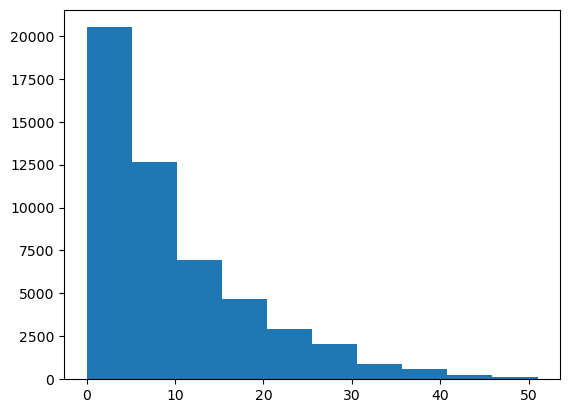

In [12]:
# check distribution
plt.hist(df['YearsCodePro'])

In [13]:
# Best value for null is median
a = df['YearsCodePro'].median()
df['YearsCodePro'] = df['YearsCodePro'].fillna(a)

In [14]:
# Done
df['YearsCodePro'].isna().sum()

0

In [15]:
# Splitting into bins

import numpy as np 
bins = [0, 5, 10, 20, np.inf]  
labels = ['0-5', '5-10', '10-20', '>20']
df['YearsCodePro'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

In [16]:
df['YearsCodePro'].value_counts()

YearsCodePro
5-10     26755
0-5      16971
10-20    13327
>20       8384
Name: count, dtype: int64

- Calculate the median `JobSat` for each range.

In [17]:
# make sure no missing values
df['JobSat'].isna().sum()

0

In [18]:
df['JobSat'].value_counts()

JobSat
8.0     43820
7.0      6379
6.0      3751
9.0      3626
10.0     2251
5.0      1956
3.0      1165
4.0      1130
2.0       772
0.0       311
1.0       276
Name: count, dtype: int64

In [19]:
median_satisfaction = df.groupby('YearsCodePro')['JobSat'].median().reset_index()
median_satisfaction

C:\Users\alvia\AppData\Local\Temp\ipykernel_35412\493799102.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_satisfaction = df.groupby('YearsCodePro')['JobSat'].median().reset_index()


,YearsCodePro,JobSat
0,0-5,8.0
1,5-10,8.0
2,10-20,8.0
3,>20,8.0



- Visualize the relationship using a bar plot or similar visualization.

C:\Users\alvia\AppData\Local\Temp\ipykernel_35412\1506864946.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='YearsCodePro', y='JobSat', data=median_satisfaction, palette='viridis')


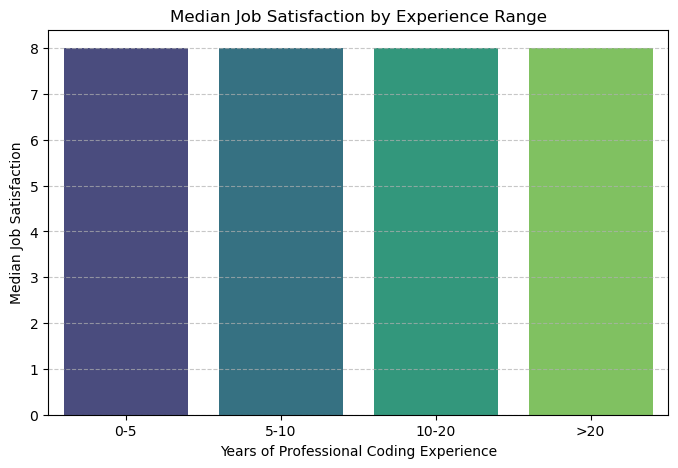

In [20]:
plt.figure(figsize=(8, 5))
sns.barplot(x='YearsCodePro', y='JobSat', data=median_satisfaction, palette='viridis')

# Formatting
plt.title('Median Job Satisfaction by Experience Range')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


C:\Users\alvia\AppData\Local\Temp\ipykernel_35412\4180628120.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['JobSat'], palette='viridis')


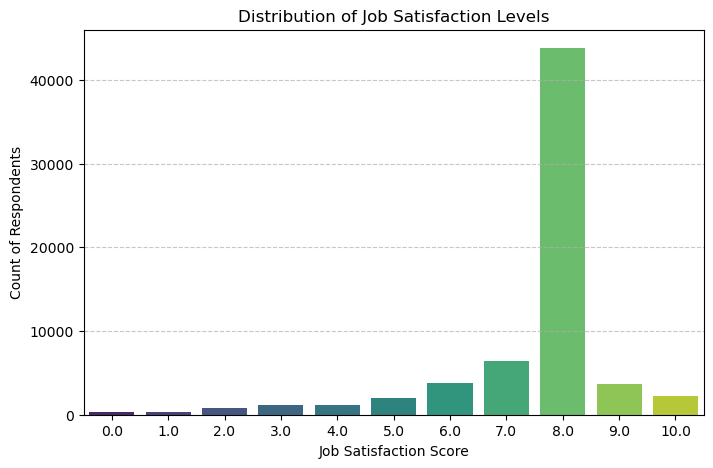

In [21]:
# Count Plot
plt.figure(figsize=(8, 5))
sns.countplot(x=df['JobSat'], palette='viridis')

# Formatting
plt.title('Distribution of Job Satisfaction Levels')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Count of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.


C:\Users\alvia\AppData\Local\Temp\ipykernel_35412\1503088623.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['RemoteWork'], palette='viridis')


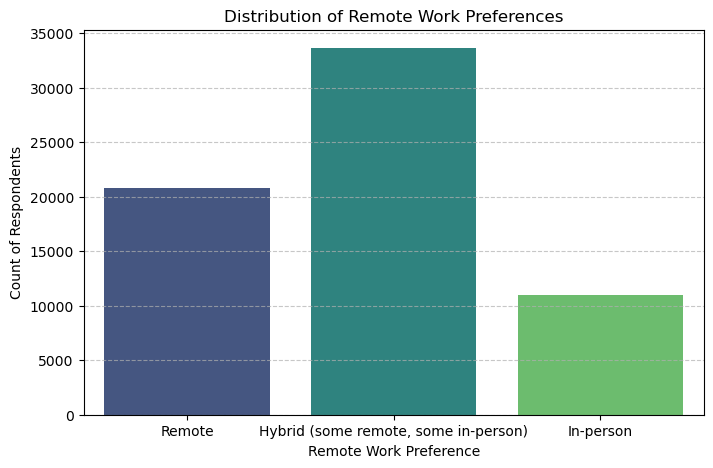

In [22]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['RemoteWork'], palette='viridis')

# Formatting
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Preference')
plt.ylabel('Count of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.

In [23]:
pd.set_option('display.max_rows', None)

# filter by employment type
df_filtered = df[df['Employment'].str.contains('full-time|part-time', case=False, na=False)]

cross_tab = pd.crosstab(df_filtered['Employment'],df['RemoteWork'], margins=True)
cross_tab.head()

RemoteWork,"Hybrid (some remote, some in-person)",In-person,Remote,All
Employment,,,,
"Employed, full-time",17296,8552,13193,39041
"Employed, full-time;Employed, part-time",85,32,95,212
"Employed, full-time;Independent contractor, freelancer, or self-employed",1330,366,1861,3557
"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time",80,17,87,184
"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time;Retired",0,1,0,1


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.


In [24]:
# Get top 10 language
Lang_values = df['LanguageHaveWorkedWith'].value_counts().head(10).index.tolist()

# Split and get unique values
unique_languages = set(lang for combo in Lang_values for lang in combo.split(';'))

# Convert to list if needed
top_languages = list(unique_languages)

top_languages

['SQL', 'JavaScript', 'TypeScript', 'Java', 'HTML/CSS', 'Python', 'PHP', 'C#']

In [25]:
# top 10 country
top_country = df['Country'].value_counts().head(10).index.to_list()

top_country

['United States of America',
 'Germany',
 'India',
 'United Kingdom of Great Britain and Northern Ireland',
 'Ukraine',
 'France',
 'Canada',
 'Poland',
 'Netherlands',
 'Brazil']

- Visualize the top programming languages by region with a bar plot or heatmap.

In [26]:
# Filter dataset
df_filtered = df[df['Country'].isin(top_country)]
df_filtered['LanguageHaveWorkedWith'] = df_filtered['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df_filtered.explode('LanguageHaveWorkedWith')

# Pivot table for heatmap
heatmap_data = df_exploded[df_exploded['LanguageHaveWorkedWith'].isin(top_languages)]
heatmap_data = heatmap_data.pivot_table(index='LanguageHaveWorkedWith', columns='Country', aggfunc='size', fill_value=0)

C:\Users\alvia\AppData\Local\Temp\ipykernel_35412\1277688821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['LanguageHaveWorkedWith'] = df_filtered['LanguageHaveWorkedWith'].str.split(';')


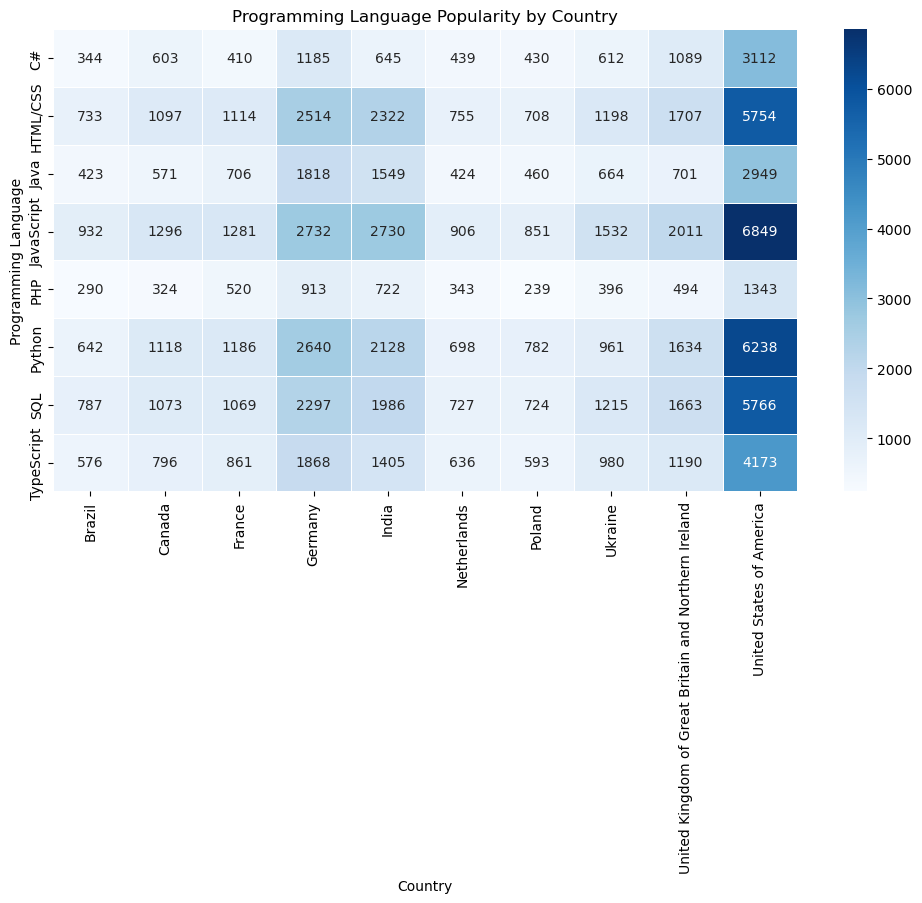

In [27]:
# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='d', linewidths=0.5)

# Formatting
plt.title('Programming Language Popularity by Country')
plt.xlabel('Country')
plt.ylabel('Programming Language')

# Show plot
plt.show()

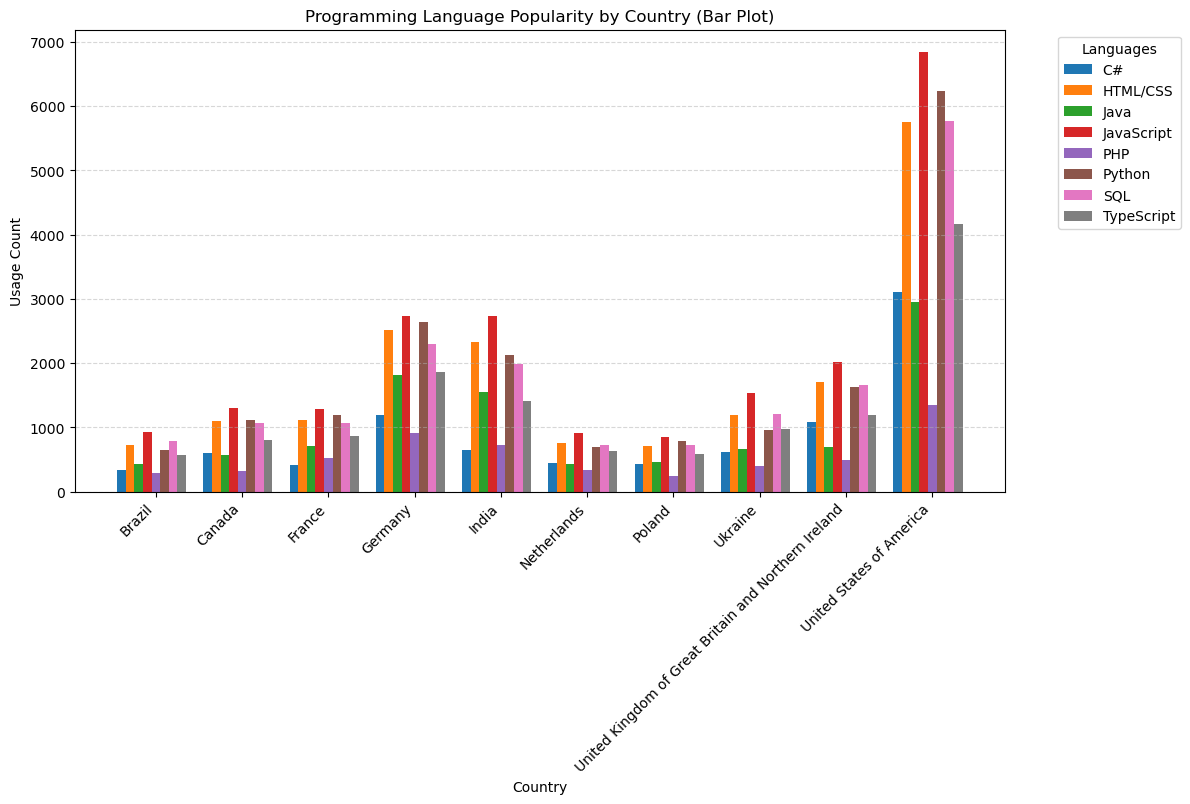

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
bar_data = heatmap_data.T  # Transpose for easier plotting
countries = bar_data.index
languages = bar_data.columns

# Set up bar width and positions
bar_width = 0.1
x = np.arange(len(countries))  # Positions for countries

# Plot bars for each language
plt.figure(figsize=(12, 6))
for i, lang in enumerate(languages):
    plt.bar(x + i * bar_width, bar_data[lang], width=bar_width, label=lang)

# Formatting
plt.xlabel('Country')
plt.ylabel('Usage Count')
plt.title('Programming Language Popularity by Country (Bar Plot)')
plt.xticks(x + bar_width * (len(languages) / 2), countries, rotation=45, ha='right')
plt.legend(title='Languages', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show plot
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


In [29]:
df['JobSatPoints_1'].isna().sum()

36113

In [30]:
df['JobSatPoints_1'].describe()

count    29324.000000
mean        18.581094
std         25.966221
min          0.000000
25%          0.000000
50%         10.000000
75%         22.000000
max        100.000000
Name: JobSatPoints_1, dtype: float64

In [31]:
a = df['JobSatPoints_1'].mode()
df['JobSatPoints_1'] = df['JobSatPoints_1'].fillna(a[0])

In [32]:
df['JobSatPoints_1'].isna().sum()

0

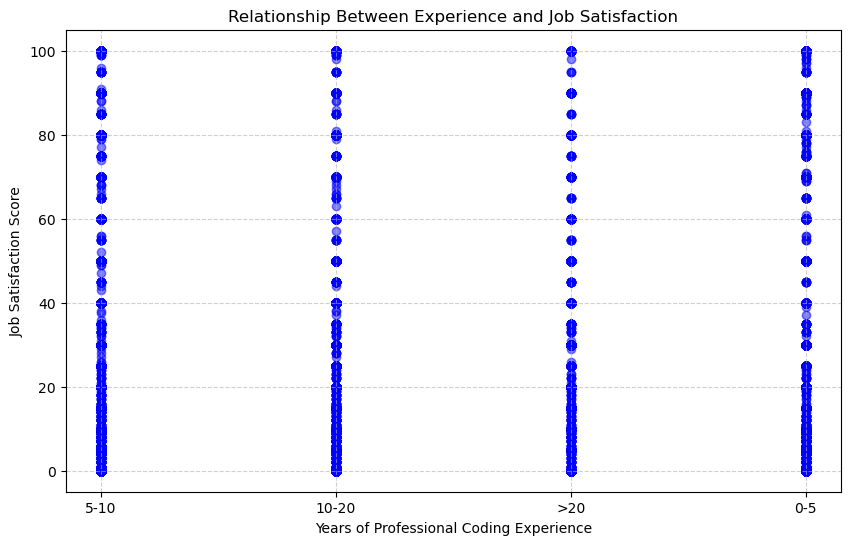

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(df['YearsCodePro'], df['JobSatPoints_1'], alpha=0.5, color='blue')

# Formatting
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score')
plt.title('Relationship Between Experience and Job Satisfaction')
plt.grid(True, linestyle='--', alpha=0.6)

# Show plot
plt.show()

C:\Users\alvia\AppData\Local\Temp\ipykernel_35412\2227132144.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(index='JobSatPoints_1', columns='YearsCodePro', aggfunc='size', fill_value=0)


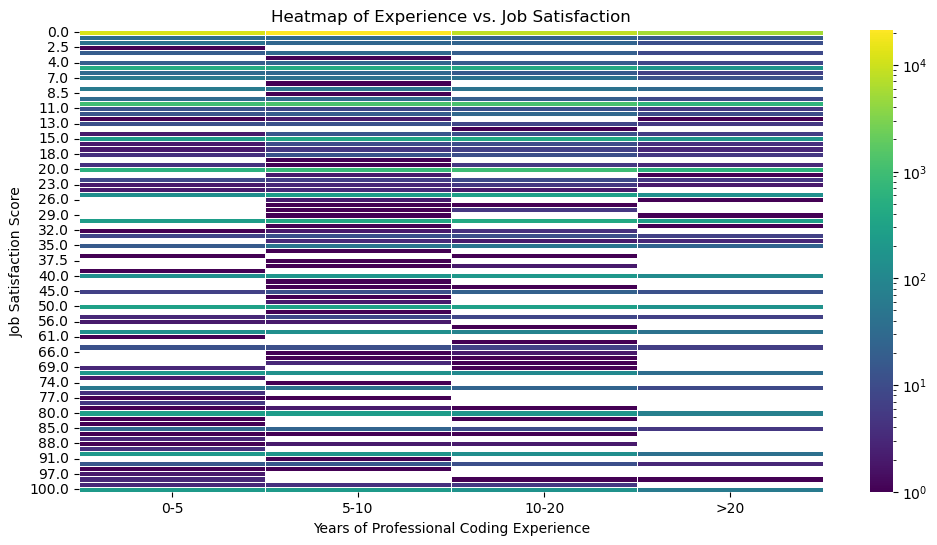

In [34]:

from matplotlib.colors import LogNorm

# Create a pivot table for heatmap
heatmap_data = df.pivot_table(index='JobSatPoints_1', columns='YearsCodePro', aggfunc='size', fill_value=0)

vmin, vmax = 1, heatmap_data.max().max()  # Avoid 0 for log scale

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=False, cbar=True,  linewidths=0.5, norm=LogNorm(vmin=vmin, vmax=vmax) )

# Formatting
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score')
plt.title('Heatmap of Experience vs. Job Satisfaction')

# Show plot
plt.show()

In [35]:
heatmap_data.head()

YearsCodePro,0-5,5-10,10-20,>20
JobSatPoints_1,,,,
0.0,12359,21354,8070,5601
1.0,33,29,22,16
2.0,39,26,24,11
2.5,1,0,0,0
3.0,18,29,20,9


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [36]:
cross_tab = pd.crosstab(df['Employment'], df['EdLevel'], margins=True)
cross_tab.head()

EdLevel,"Associate degree (A.A., A.S., etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Primary/elementary school,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",Some college/university study without earning a degree,Something else,All
Employment,,,,,,,,,
"Employed, full-time",1059,16806,11011,160,2073,1460,3579,377,36525
"Employed, full-time;Employed, part-time",9,90,61,1,8,9,15,3,196
"Employed, full-time;Independent contractor, freelancer, or self-employed",104,1381,963,25,159,181,492,41,3346
"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time",11,79,45,1,10,6,14,2,168
"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time;Retired",0,0,0,0,1,0,0,0,1


In [37]:
top_employment = df['Employment'].value_counts().head(15).index.to_list()
top_employment

['Employed, full-time',
 'Independent contractor, freelancer, or self-employed',
 'Student, full-time',
 'Employed, full-time;Independent contractor, freelancer, or self-employed',
 'Not employed, but looking for work',
 'Employed, part-time',
 'Student, full-time;Employed, part-time',
 'Employed, full-time;Student, full-time',
 'Employed, full-time;Student, part-time',
 'Student, full-time;Not employed, but looking for work',
 'Not employed, and not looking for work',
 'Student, part-time;Employed, part-time',
 'I prefer not to say',
 'Retired',
 'Student, part-time']

In [38]:
ed = df['EdLevel'].value_counts().index.to_list()
ed

['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
 'Some college/university study without earning a degree',
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
 'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
 'Associate degree (A.A., A.S., etc.)',
 'Primary/elementary school',
 'Something else']

In [39]:
filtered_df = df[df['Employment'].isin(top_employment) & df['EdLevel'].isin(ed)]

In [40]:
pivot_table = filtered_df.pivot_table(
    index='Employment',   # Column name, NOT a list
    columns='EdLevel',    # Column name, NOT a list
    aggfunc='size',       # Use 'size' to count occurrences
    fill_value=0
)

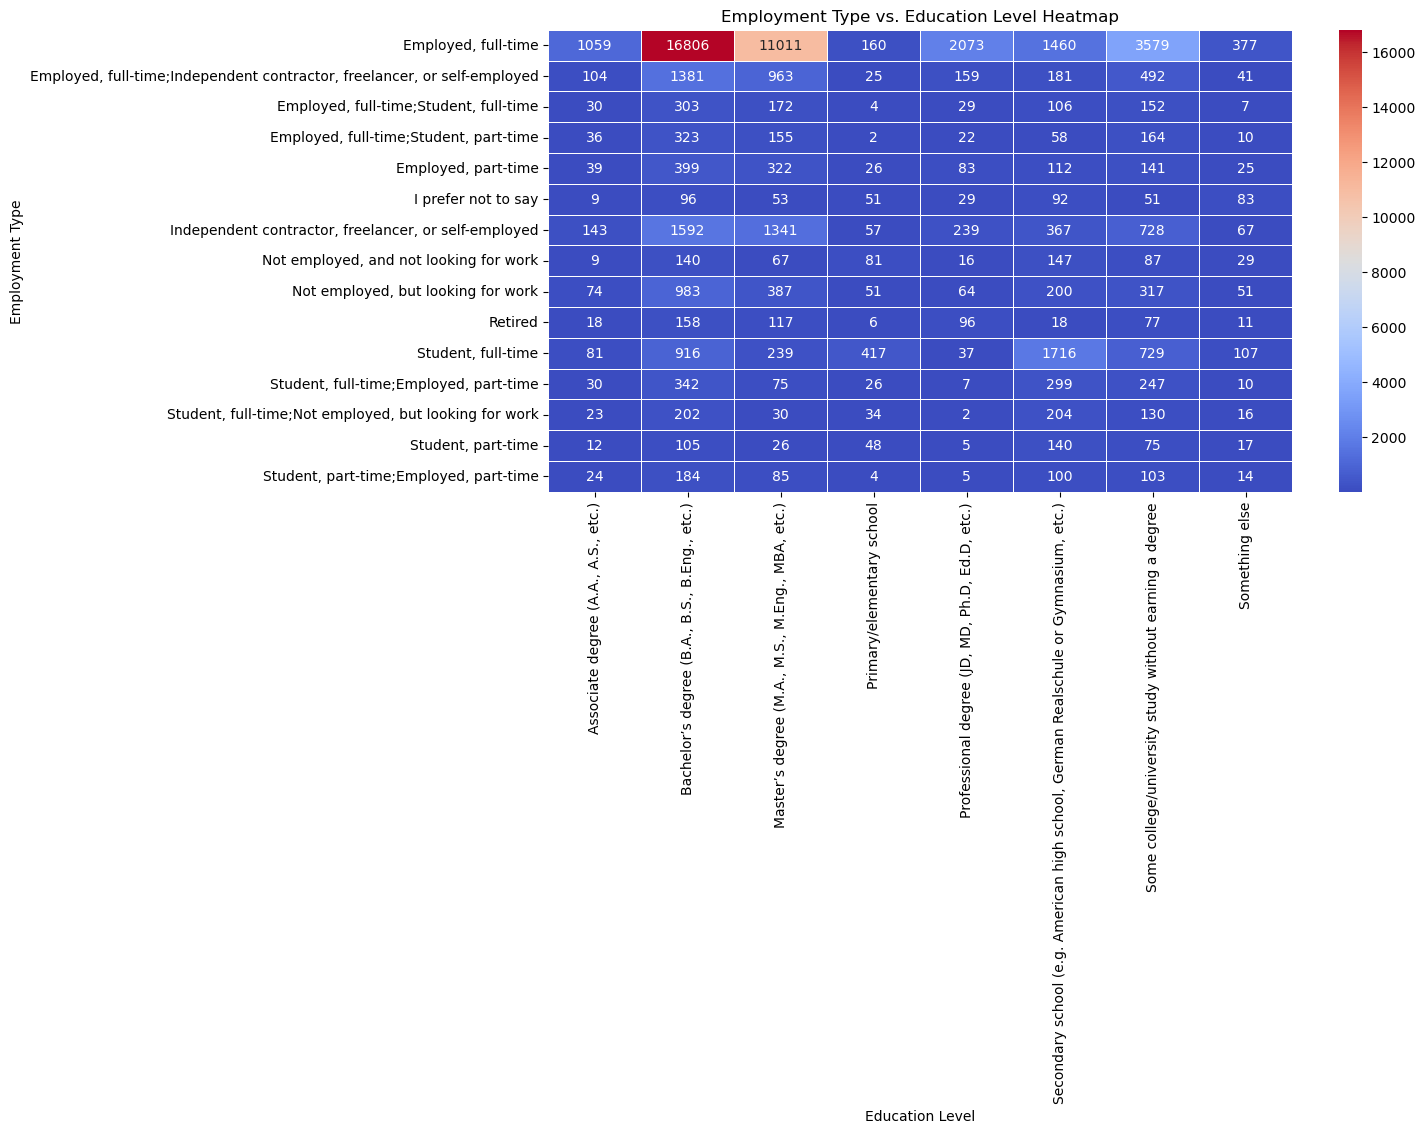

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12, 6))

# Create heatmap
sns.heatmap(
    pivot_table, 
    cmap='coolwarm',  # Color scheme
    annot=True,  # Display values inside cells
    fmt='d',  # Integer formatting
    linewidths=0.5,  # Grid line width
    cbar=True  # Show color bar
)

# Formatting
plt.xlabel('Education Level')
plt.ylabel('Employment Type')
plt.title('Employment Type vs. Education Level Heatmap')

# Show plot
plt.show()


Copyright © IBM Corporation. All rights reserved.
